# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [366]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [367]:
builders = tfds.list_builders()

builders

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [368]:
data, info = tfds.load('mnist', with_info=True)

train_data, test_data = data['train'], data['test']

In [369]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\kksoo\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [370]:
import numpy as np

In [371]:
num_items = 20
num_list = np.arange(num_items)

In [372]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [373]:
num_list_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [374]:
for item in num_list_dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [375]:
import itertools

def gen():
    for i in itertools.count(1):
        yield (i, [1] * i)
    
dataset = tf.data.Dataset.from_generator(gen, (tf.int64, tf.int64), (tf.TensorShape([]), tf.TensorShape([None])))

list(dataset.take(3).as_numpy_iterator())

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64))]

In [376]:
def gen(stop):
    for i in itertools.count(1):
        if i < stop:
            yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None])),
    args=[10]
)

list(dataset.take(7).as_numpy_iterator())

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64)),
 (4, array([1, 1, 1, 1], dtype=int64)),
 (5, array([1, 1, 1, 1, 1], dtype=int64)),
 (6, array([1, 1, 1, 1, 1, 1], dtype=int64)),
 (7, array([1, 1, 1, 1, 1, 1, 1], dtype=int64))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [377]:
dataset = num_list_dataset.repeat(3).batch(7)

In [378]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int32)


In [379]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [380]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [381]:
dataset = tf.data.Dataset.range(1, 6).map(lambda x: x * 2)

list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [382]:
dataset = tf.data.Dataset.range(5)
res = dataset.map(lambda x: x + 1)

res

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [383]:
elems = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = tf.data.Dataset.from_generator(lambda: elems, (tf.int32, tf.string))
res = dataset.map(lambda x_int, y_str: x_int)

list(res.as_numpy_iterator())

[1, 2, 3]

In [384]:
dataset = tf.data.Dataset.range(3)

def g(x):
    return tf.constant(10.5), tf.constant(['One', 'Two', 'Three'])

res = dataset.map(g)

res.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [385]:
dataset = tf.data.Dataset.range(3)

def h(x):
    return 10.5, ['One', 'Two', 'Three'], np.array([1., 2.])

res = dataset.map(h)

res.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [386]:
def i(x):
    return (10.5, [12, 11]), 'One', 'Two'

res = dataset.map(i)

res.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [387]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4]).filter(lambda x: x < 3)

list(dataset.as_numpy_iterator())

[1, 2]

In [388]:
def filter_fn(x):
    return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)

list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [389]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [390]:
train_dataset = dataset['train'].batch(5).shuffle(5).take(2)

for data in train_dataset:
    print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'During a sleepless night, I was switching through the channels & found this embarrassment of a movie. What were they thinking?<br /><br />If this is life after "Remote Control" for Kari (Wuhrer) Salin, no wonder she\'s gone nowhere.<br /><br />And why did David Keith take this role? It\'s pathetic!<br /><br />Anyway, I turned on the movie near the end, so I didn\'t get much of the plot. But this must\'ve been the best part. This nerdy college kid brings home this dominatrix-ish girl...this scene is straight out of the comic books -- or the cheap porn movies. She calls the mother anal retentive and kisses the father "Oh, I didn\'t expect tongue!" Great lines!<br /><br />After this, I had to see how it ended..<br /><br />Well, of course, this bitch from hell has a helluva past, so the SWAT team is upstairs. And yes...they surround her! And YES YES! The kid blows her brains out!!!! AHAHHAHAHAHA!!<br /><br />This is must-see TV. <br />

### get_next()

In [391]:
dataset = tf.data.Dataset.range(2)

for elem in dataset:
    print(elem)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [392]:
dataset = tf.data.Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [393]:
a = np.random.randint(0, 10, size=(2, 3))
print(a)

dataset = tf.data.Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[4 5 1]
 [9 0 4]]
tf.Tensor([4 5 1], shape=(3,), dtype=int32)
tf.Tensor([9 0 4], shape=(3,), dtype=int32)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [394]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from keras.models import Model
from keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [395]:
(x_train, y_train), (x_test, y_test) = load_data()

In [396]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### 데이터 전처리

In [397]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [398]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1_000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [399]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 확인

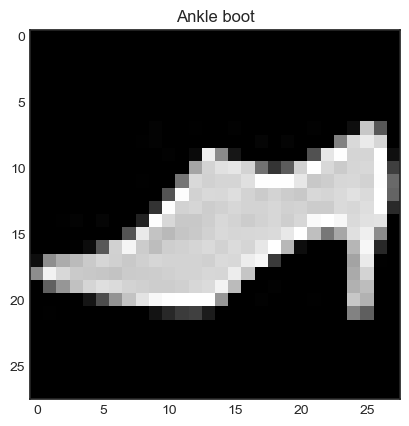

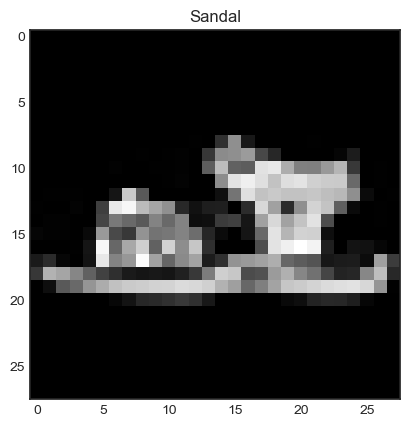

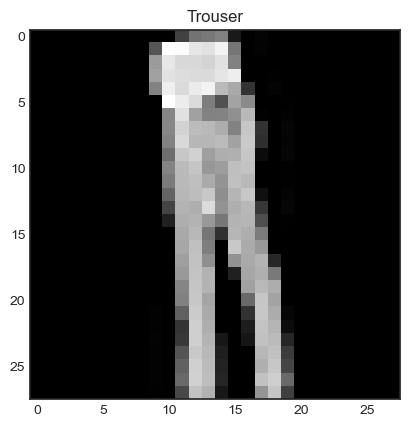

In [400]:
for img, label in train_ds.take(3):
    plt.title(class_names[label[0]])
    plt.imshow(img[0, :, :], cmap='gray')
    plt.show()

### 모델 생성
- 임의의 모델

In [401]:
def build_model():
    inp = Input(shape=(28, 28), name='Input')

    flat = Flatten(input_shape=(28, 28), name='Flatten')(inp)

    hid_1 = Dense(256, kernel_initializer='he_normal', name='Dense_1')(flat)
    hid_1 = BatchNormalization(name='Bn_1')(hid_1)
    hid_1 = Activation('relu', name='Act_1')(hid_1)
    drop_1 = Dropout(0.5, name='drop_1')(hid_1)

    hid_2 = Dense(128, kernel_initializer='he_normal', name='Dense_2')(drop_1)
    hid_2 = BatchNormalization(name='Bn_2')(hid_2)
    hid_2 = Activation('relu', name='Act_2')(hid_2)
    drop_2 = Dropout(0.5, name='drop_2')(hid_2)

    hid_3 = Dense(128, kernel_initializer='he_normal', name='Dense_3')(drop_2)
    hid_3 = BatchNormalization(name='Bn_3')(hid_3)
    hid_3 = Activation('relu', name='Act_3')(hid_3)
    drop_3 = Dropout(0.5, name='drop_3')(hid_3)

    hid_4 = Dense(64, kernel_initializer='he_normal', name='Dense_4')(drop_3)
    hid_4 = BatchNormalization(name='Bn_4')(hid_4)
    hid_4 = Activation('relu', name='Act_4')(hid_4)
    drop_4 = Dropout(0.5, name='drop_4')(hid_4)
    
    out = Dense(10, activation='softmax', name="Output")(drop_4)

    model = Model(inputs=inp, outputs=out)

    return model

In [402]:
model = build_model()

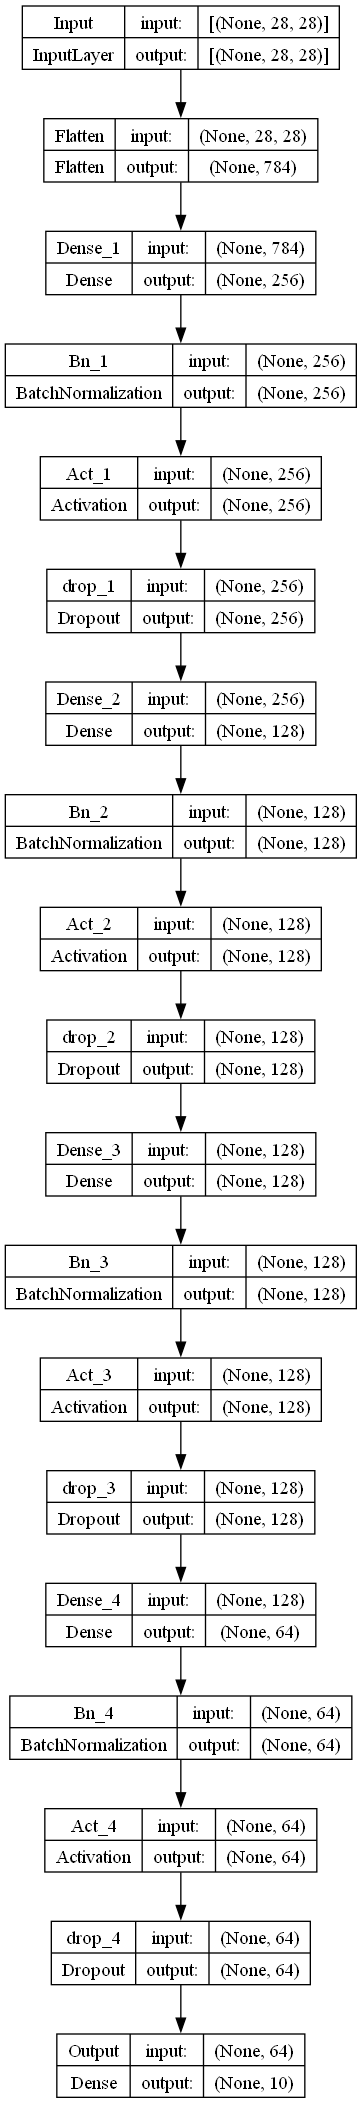

In [403]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [404]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [405]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [406]:
@tf.function
def train_step(imgs, labels):
    with tf.GradientTape() as tape:
        pred = model(imgs)
        loss = loss_obj(labels, pred)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, pred)

In [407]:
@tf.function
def test_step(imgs, labels):
    pred = model(imgs)
    t_loss = loss_obj(labels, pred)

    test_loss(t_loss)
    test_accuracy(labels, pred)

In [408]:
epochs = 30

for epoch in range(epochs):
    for train_img, train_label in train_ds:
        train_step(train_img, train_label)
    
    for test_img, test_label in test_ds:
        test_step(test_img, test_label)
    
    template = f'Epochs: {epoch + 1:3d}, Loss: {train_loss.result():.4f}, Accuracy: {train_accuracy.result() * 100:.4f}%, Test Loss: {test_loss.result():.4f}, Test Accuracy: {test_accuracy.result() * 100:.4f}%'
    print(template)

Epochs:   1, Loss: 0.4836, Accuracy: 82.5183%, Test Loss: 0.4143, Test Accuracy: 85.0700%
Epochs:   2, Loss: 0.4277, Accuracy: 84.4225%, Test Loss: 0.4072, Test Accuracy: 85.2450%
Epochs:   3, Loss: 0.3966, Accuracy: 85.5089%, Test Loss: 0.3999, Test Accuracy: 85.4900%
Epochs:   4, Loss: 0.3747, Accuracy: 86.2846%, Test Loss: 0.3944, Test Accuracy: 85.7300%
Epochs:   5, Loss: 0.3580, Accuracy: 86.8520%, Test Loss: 0.3845, Test Accuracy: 86.1900%
Epochs:   6, Loss: 0.3442, Accuracy: 87.3178%, Test Loss: 0.3805, Test Accuracy: 86.4083%
Epochs:   7, Loss: 0.3325, Accuracy: 87.7357%, Test Loss: 0.3758, Test Accuracy: 86.6386%
Epochs:   8, Loss: 0.3225, Accuracy: 88.0777%, Test Loss: 0.3710, Test Accuracy: 86.8550%
Epochs:   9, Loss: 0.3137, Accuracy: 88.3835%, Test Loss: 0.3697, Test Accuracy: 86.9533%
Epochs:  10, Loss: 0.3056, Accuracy: 88.6650%, Test Loss: 0.3668, Test Accuracy: 87.0900%
Epochs:  11, Loss: 0.2982, Accuracy: 88.9186%, Test Loss: 0.3647, Test Accuracy: 87.2164%
Epochs:  1

### 모델 학습 : 2번째 방법 (Keras)

In [409]:
from sklearn.model_selection import train_test_split

In [410]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=.3, random_state=777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

model = build_model()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model.summary()

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)
(42000,)
(18000,)
(10000,)
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_1 (Dense)             (None, 256)               200960    
                                                                 
 Bn_1 (BatchNormalization)   (None, 256)               1024      
                                                                 
 Act_1 (Activation)          (None, 256)               0         
                                                                 
 drop_1 (Dropout)            (None, 256)               0         
                                                 

5~6분 소요

In [411]:
from keras.callbacks import EarlyStopping

In [412]:
early_stop_cb = EarlyStopping(
    patience=20,
    monitor='val_loss',
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=512,
    shuffle=True,
    validation_data=(x_val, y_val),
    callbacks=[early_stop_cb]
)

Epoch 1/1000
83/83 [==============================] - 3s 13ms/step - loss: 2.7119 - accuracy: 0.1263 - val_loss: 2.0855 - val_accuracy: 0.3733
Epoch 2/1000
83/83 [==============================] - 1s 10ms/step - loss: 2.3795 - accuracy: 0.1751 - val_loss: 1.9386 - val_accuracy: 0.4756
Epoch 3/1000
83/83 [==============================] - 1s 10ms/step - loss: 2.1860 - accuracy: 0.2248 - val_loss: 1.7611 - val_accuracy: 0.5232
Epoch 4/1000
83/83 [==============================] - 1s 10ms/step - loss: 2.0428 - accuracy: 0.2666 - val_loss: 1.6125 - val_accuracy: 0.5624
Epoch 5/1000
83/83 [==============================] - 1s 10ms/step - loss: 1.9182 - accuracy: 0.3105 - val_loss: 1.4933 - val_accuracy: 0.5843
Epoch 6/1000
83/83 [==============================] - 1s 10ms/step - loss: 1.8152 - accuracy: 0.3442 - val_loss: 1.3989 - val_accuracy: 0.6119
Epoch 7/1000
83/83 [==============================] - 1s 10ms/step - loss: 1.7305 - accuracy: 0.3766 - val_loss: 1.3242 - val_accuracy: 0.6302

In [413]:
history_dict = history.history

### 모델 평가

In [414]:
model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8739


[0.37320664525032043, 0.8738999962806702]

### 결과 확인

In [415]:
test_img = x_test[0, :, :]

print(test_img.shape)

(28, 28)


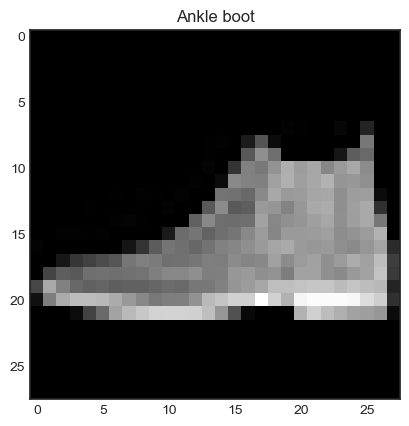

In [416]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

In [429]:
pred = model.predict(test_img.reshape(-1, 28, 28))

1/1 [==============================] - 0s 15ms/step


In [430]:
pred.shape

(1, 10)

In [431]:
pred

array([[1.6433129e-06, 2.4952274e-06, 9.2797218e-06, 1.0235959e-06,
        2.4126359e-06, 6.6879345e-03, 4.3280812e-07, 4.7860030e-02,
        7.2664056e-06, 9.4542748e-01]], dtype=float32)

In [434]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [435]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]

print(test_batch.shape)

(32, 28, 28)


In [436]:
pred = model.predict(test_batch)

pred.shape

1/1 [==============================] - 0s 22ms/step


(32, 10)

In [437]:
pred_arg = np.argmax(pred, axis=-1)

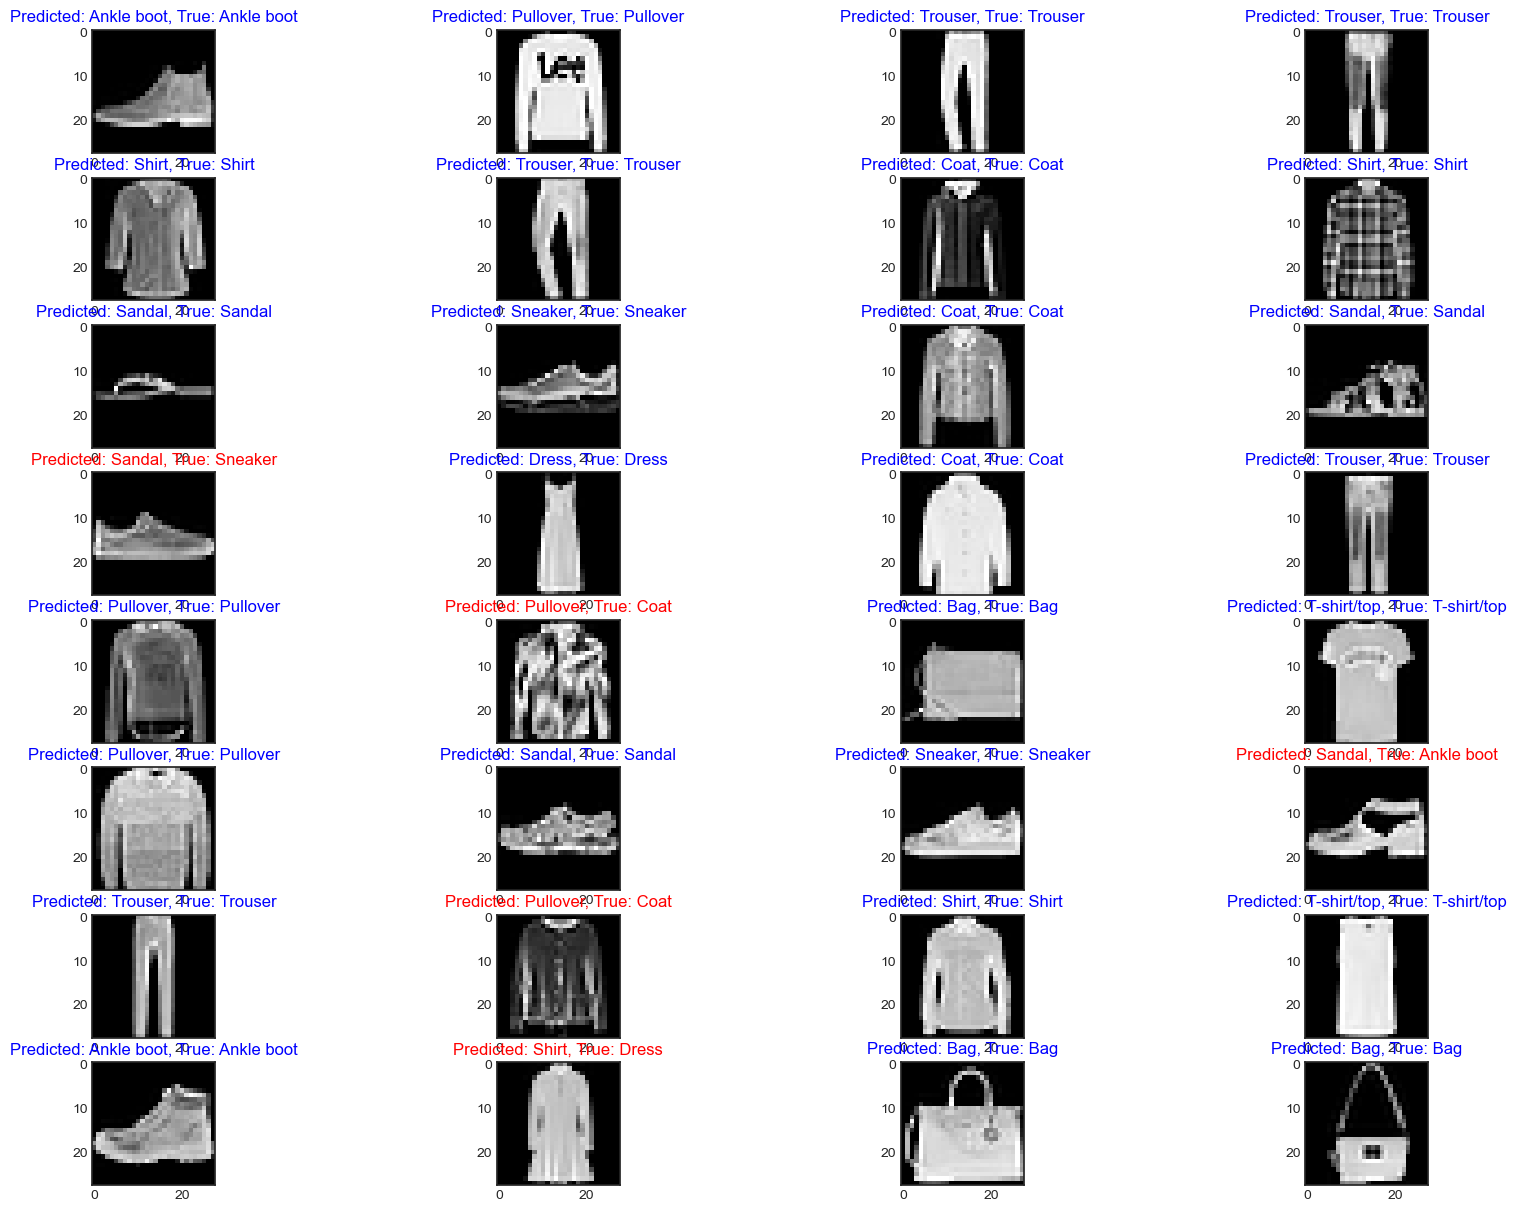

In [441]:
n_rows = 8
n_cols = 4
n_imgs = n_rows * n_cols

plt.figure(figsize=(20, 15))

for i in range(1, n_imgs + 1):
    plt.subplot(n_rows, n_cols, i)
    if class_names[pred_arg[i - 1]] == class_names[test_batch_y[i - 1]]:
        color = 'b'
    else:
        color = 'r'
    plt.title(f"Predicted: {class_names[pred_arg[i - 1]]}, True: {class_names[test_batch_y[i - 1]]}", color=color)
    plt.imshow(test_batch[i - 1], cmap='gray')

plt.show()